In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [4]:
train=pd.read_csv("../input/stage2_newtrain_w2v_w28_t512.txt",header=None)
train.columns=['ID','topic','cnt']
train = pd.pivot_table(train, values='cnt', index=['ID'],
               columns=['topic'], aggfunc=np.sum)
train.shape

(3683, 512)

In [6]:
test=pd.read_csv("../input/stage2_newtest_w2v_w28_t512.txt",header=None)
test.columns=['ID','topic','cnt']
test = pd.pivot_table(test, values='cnt', index=['ID'],
               columns=['topic'], aggfunc=np.sum)
test.shape

(986, 512)

In [7]:
train=train.apply(lambda u: u/u.sum(),axis=1)
test=test.apply(lambda u: u/u.sum(),axis=1)

In [8]:
(test.columns==train.columns).all()

True

In [9]:
joined=pd.concat([train,test])
joined.shape

(4669, 512)

In [10]:
idf=np.log(1/(joined>0).mean())

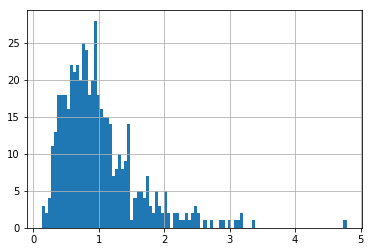

topic
468    0.138777
165    0.176130
140    0.177919
136    0.202266
139    0.207524
170    0.252263
137    0.266980
138    0.270342
232    0.270904
493    0.278798
40     0.279364
164    0.280497
489    0.282200
402    0.285044
41     0.285899
45     0.287896
161    0.292764
109    0.296502
414    0.300255
131    0.324253
408    0.334375
142    0.337372
214    0.338273
160    0.341884
172    0.346719
237    0.350361
469    0.356155
163    0.356767
167    0.357379
478    0.357685
         ...   
99     2.040171
417    2.061821
19     2.085672
134    2.158985
26     2.172057
459    2.189119
17     2.212331
357    2.234092
75     2.285385
8      2.332808
462    2.352876
361    2.373354
458    2.418015
463    2.427677
363    2.477438
135    2.482553
11     2.495457
204    2.519111
256    2.543338
258    2.622700
223    2.734967
97     2.861452
74     2.895741
96     3.014978
235    3.082724
460    3.145395
329    3.175701
328    3.175701
330    3.367296
331    4.785139
dtype: float64

In [11]:
idf.hist(bins=100);plt.show()
idf.sort_values()

In [12]:
#idf=1

In [13]:
train_tfidf=train*idf

In [14]:
train_tfidf[train_tfidf==0]=np.nan
train_tfidf.columns=['t512_'+str(u) for u in train_tfidf.columns]

In [15]:
train_tfidf.to_csv("../input/stage2_newtrain_topic512_w28_tfidf.csv")

In [16]:
train_tfidf.shape

(3683, 512)

In [17]:
test_tfidf=test*idf

In [18]:
test_tfidf[test_tfidf==0]=np.nan
test_tfidf.columns=['t512_'+str(u) for u in test_tfidf.columns]

In [19]:
test_tfidf.to_csv("../input/stage2_newtest_topic512_w28_tfidf.csv")

In [20]:
test_tfidf.shape

(986, 512)

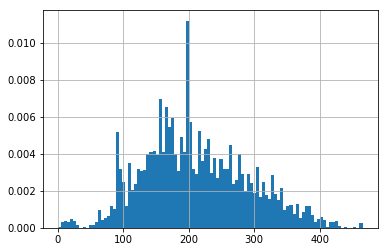

In [21]:
(train_tfidf>0).sum(1).hist(bins=100,normed=True)

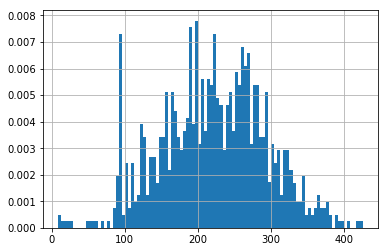

In [22]:
(test_tfidf>0).sum(1).hist(bins=100,normed=True)